<a href="https://colab.research.google.com/github/Hansal21/SnapIt/blob/main/FirstOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/My Drive/train.csv')

In [ ]:
df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE
0,952289,Lipstick queen reserved maiwu,4,Beauty/Makeup/Lips,NaN,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0
1,121903,Garbage Pail Kids blu ray,3,Electronics/Media/Blu-Ray,NaN,1,26Plays great. Tested. Watched once. No scratc...,15.0
2,280534,green floam/slime,1,Kids/Toys/Arts & Crafts,NaN,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0
3,787961,Wallet beige monogram,1,Women/Women's Accessories/Wallets,NaN,0,Wallet brand new never used,31.0
4,479292,Triangle Bike Or Body Blue Light,3,Sports & Outdoors/Outdoors/Other,NaN,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0


In [ ]:
df.isnull().sum()

PRODUCT_ID                    0
PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                   5416
PRODUCT_BRAND            537885
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           3
PRODUCT_PRICE                 0
dtype: int64

In [ ]:
df.drop(axis="columns", labels="PRODUCT_ID", inplace=True)

In [ ]:
null_index = df.index[df['PRODUCT_DESCRIPTION'].isnull()]

In [ ]:
df.drop(axis="rows", index=null_index, inplace=True)

In [ ]:
df.isnull().sum()

PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                   5416
PRODUCT_BRAND            537883
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           0
PRODUCT_PRICE                 0
dtype: int64

In [ ]:
df.describe()

,PRODUCT_CONDITION,SHIPPING_AVAILABILITY,PRODUCT_PRICE
count,1.260151e+06,1.260151e+06,1.260151e+06
mean,1.907478e+00,4.472393e-01,2.672049e+01
std,9.032447e-01,4.972087e-01,3.855898e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+01
50%,2.000000e+00,0.000000e+00,1.700000e+01
75%,3.000000e+00,1.000000e+00,2.900000e+01
max,5.000000e+00,1.000000e+00,2.009000e+03


In [ ]:
free_products = df.index[df['PRODUCT_PRICE']==0]

In [ ]:
df.drop(axis="rows", index=free_products, inplace=True)

In [ ]:
df[(df['PRODUCT_DESCRIPTION'] == 'No description yet')]['PRODUCT_PRICE'].describe()

count    70171.000000
mean        21.980697
std         29.244397
min          3.000000
25%         10.000000
50%         15.000000
75%         25.000000
max       1400.000000
Name: PRODUCT_PRICE, dtype: float64

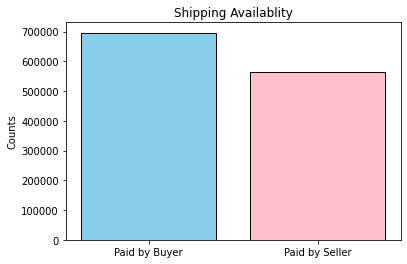

In [ ]:
shipping = ['Paid by Buyer', 'Paid by Seller']
counts = [(df['SHIPPING_AVAILABILITY']==0).sum(),(df['SHIPPING_AVAILABILITY']==1).sum()]
plt.bar(shipping,counts,color=['skyblue','pink'],edgecolor='black')
plt.title("Shipping Availablity")
plt.ylabel("Counts")
plt.show()

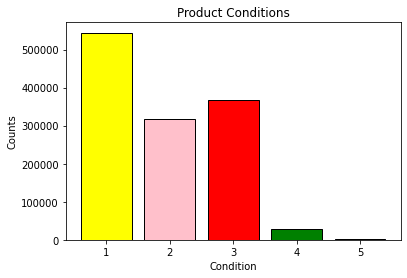

In [ ]:
cat = ['1','2','3','4','5']
counts = [(df['PRODUCT_CONDITION']==1).sum(),(df['PRODUCT_CONDITION']==2).sum(),(df['PRODUCT_CONDITION']==3).sum(),(df['PRODUCT_CONDITION']==4).sum(),(df['PRODUCT_CONDITION']==5).sum()]
plt.bar(cat,counts,color=['yellow','pink','red','green','blue'],edgecolor='black')
plt.title("Product Conditions")
plt.xlabel("Condition")
plt.ylabel("Counts")
plt.show()

In [ ]:
(df['CATEGORY'].str.count('/')).max()

4.0

The above Operation shows 'The maximum occurence of / in column CATEGORY'.

Thus Maximum number of Categories can be 5.

In [ ]:
df[['CATEGORY_1','CATEGORY_2','CATEGORY_3','CATEGORY_4','CATEGORY_5']]=df.CATEGORY.str.split("/",expand=True).loc[:,:4]

In [ ]:
df.head()

,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,CATEGORY_5
0,Lipstick queen reserved maiwu,4,Beauty/Makeup/Lips,NaN,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0,Beauty,Makeup,Lips,None,None
1,Garbage Pail Kids blu ray,3,Electronics/Media/Blu-Ray,NaN,1,26Plays great. Tested. Watched once. No scratc...,15.0,Electronics,Media,Blu-Ray,None,None
2,green floam/slime,1,Kids/Toys/Arts & Crafts,NaN,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0,Kids,Toys,Arts & Crafts,None,None
3,Wallet beige monogram,1,Women/Women's Accessories/Wallets,NaN,0,Wallet brand new never used,31.0,Women,Women's Accessories,Wallets,None,None
4,Triangle Bike Or Body Blue Light,3,Sports & Outdoors/Outdoors/Other,NaN,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0,Sports & Outdoors,Outdoors,Other,None,None


In [ ]:
(df['CATEGORY_4'].isna()).sum()

1255723

In [ ]:
(df['CATEGORY_5'].isna()).sum()

1256846

In [ ]:
(df['CATEGORY_3'].isna()).sum()

5407

In [ ]:
df.shape

(1259411, 12)

In [ ]:
df.drop(axis='columns',labels=['CATEGORY','CATEGORY_4','CATEGORY_5'],inplace=True)

In [ ]:
df.head()

,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,CATEGORY_1,CATEGORY_2,CATEGORY_3
0,Lipstick queen reserved maiwu,4,NaN,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0,Beauty,Makeup,Lips
1,Garbage Pail Kids blu ray,3,NaN,1,26Plays great. Tested. Watched once. No scratc...,15.0,Electronics,Media,Blu-Ray
2,green floam/slime,1,NaN,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0,Kids,Toys,Arts & Crafts
3,Wallet beige monogram,1,NaN,0,Wallet brand new never used,31.0,Women,Women's Accessories,Wallets
4,Triangle Bike Or Body Blue Light,3,NaN,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0,Sports & Outdoors,Outdoors,Other


In [ ]:
df.isna().sum()

PRODUCT_NAME                  0
PRODUCT_CONDITION             0
PRODUCT_BRAND            537586
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           0
PRODUCT_PRICE                 0
CATEGORY_1                 5407
CATEGORY_2                 5407
CATEGORY_3                 5407
dtype: int64

As of now we are removing null Categories. Let us know if there is any better solution.

By removing these NULL Categories number of Brands reduced by 17.

One of the solution we came across, replaced the Null values by "Not Available" making it a new Category in itself

In [ ]:
df.drop(axis='rows', index= df.index[df['CATEGORY_1'].isna()], inplace=True)

In [ ]:
category=df['CATEGORY_1'].unique()
category.shape

(10,)

In [ ]:
catcounts=[0]*category.shape[0]
for i in range(category.shape[0]):
  catcounts[i] = (df['CATEGORY_1']==category[i]).sum()

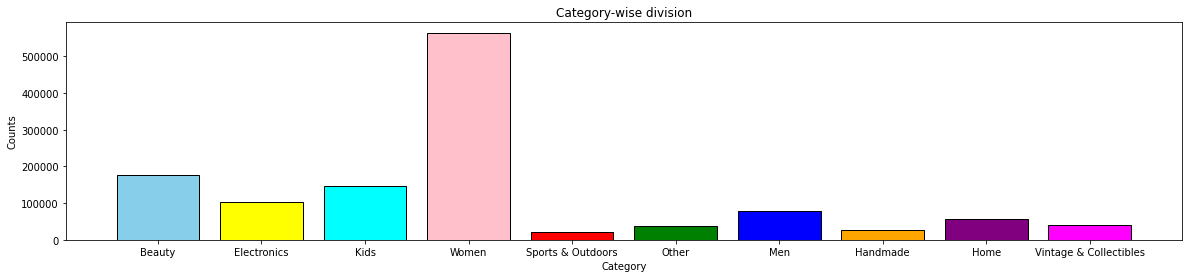

In [ ]:
f = plt.figure()
f.set_figwidth(20)
plt.bar(category,catcounts,edgecolor='black',color=['skyblue','yellow','aqua','pink','red','green','blue','orange','purple','magenta'])
plt.title("Category-wise division")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.show()


In [ ]:
category2=df['CATEGORY_2'].unique()
category2.shape

(113,)

In [ ]:
category3=df['CATEGORY_3'].unique()
category3.shape

(863,)

In [ ]:
brands = df['PRODUCT_BRAND'].unique().tolist()

In [ ]:
null_idx = df.index[df['PRODUCT_BRAND'].isna()]

In [ ]:
null_idx

Int64Index([      0,       1,       2,       3,       4,       8,      10,
                 11,      12,      15,
            ...
            1260136, 1260137, 1260139, 1260140, 1260141, 1260144, 1260145,
            1260150, 1260151, 1260153],
           dtype='int64', length=534629)

In [ ]:
# c=0
# for i in null_idx:
#   if(c%10000==0):
#     print(c) 
#   flag = 0
#   c=c+1
#   myStr = df['PRODUCT_DESCRIPTION'][i] + ' ' + df['PRODUCT_NAME'][i]
#   # print(myStr)
#   for name in brands[1:]:
#     if(name in myStr):
#       df.at[i, 'PRODUCT_BRAND'] = name
#       flag=1
#       break

The above Snippet of code takes a lot of time to execute

So, We executed it once and saved its output to another csv file, which we'll use from now on. Just to save some time

In [ ]:
# ((df['PRODUCT_BRAND'][null_idx]).isna()).sum()

>Output: 204982

Total Null Product Brands = 534629

Null Product Brands After imputing values = 204982

Replacing those 204982 Null Product Brands by 'Unknown'

In [ ]:
# (df['PRODUCT_BRAND']).fillna('Unknown', inplace=True)

In [ ]:
# (df['PRODUCT_BRAND']=='Unknown').sum()

>Output: 204982

In [ ]:
# df.to_csv('gdrive/My Drive/Imputed_values.csv')

>Imputed Brand values Saved Successfully to the drive

In [ ]:
# new_df = pd.read_csv('gdrive/My Drive/Imputed_values_unknowns.csv')

In [ ]:
# (((new_df['PRODUCT_BRAND']=='Unknown').sum())/new_df['PRODUCT_BRAND'].shape[0])*100

Still, 16.35% of Brand names are Unknown, but we will move on for now

In [ ]:
import re

In [ ]:
# c = 0
# for i in range(new_df.shape[0]):
#   if(c%10000==0):
#     print(c)
#   c = c+1
#   temp = str(new_df['CATEGORY_1'][i])
#   temp = re.sub('[^A-Za-z0-9]+',' ',temp)
#   temp = temp.lower()
#   temp = temp.split()
#   temp = '_'.join(temp)
#   new_df.at[i, 'CATEGORY_1'] = temp

#   temp = str(new_df['CATEGORY_2'][i])
#   temp = re.sub('[^A-Za-z0-9]+',' ',temp)
#   temp = temp.lower()
#   temp = temp.split()
#   temp = '_'.join(temp)
#   new_df.at[i, 'CATEGORY_2'] = temp

#   temp = str(new_df['CATEGORY_3'][i])
#   temp = re.sub('[^A-Za-z0-9]+',' ',temp)
#   temp = temp.lower()
#   temp = temp.split()
#   temp = '_'.join(temp)
#   new_df.at[i, 'CATEGORY_3'] = temp

In [ ]:
# new_df.to_csv('gdrive/My Drive/Imputed_plus_Updated_Category.csv')

> Changes to Categories Saved Successfully to the drive

In [ ]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [ ]:
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# lemmatizer=WordNetLemmatizer()
# c=0
# for i in range(new_df.shape[0]):
#     if(c%10000==0):
#       print(c)
#     c = c+1
#     temp = str(new_df['PRODUCT_DESCRIPTION'][i])
#     temp = re.sub('[^a-zA-Z0-9]', ' ', temp)
#     temp = temp.lower()
#     temp = temp.split()
#     temp = [lemmatizer.lemmatize(word) for word in temp if not word in set(stopwords.words('english')) and word!='rm']
#     temp = ' '.join(temp)
#     new_df.at[i, 'PRODUCT_DESCRIPTION'] = temp

In [ ]:
# new_df.to_csv('gdrive/My Drive/Imputed_plus_Updated_NLP.csv')

> Lemmatized and removed the word "rm" from it (As mentioned in the Description)<br>And Saved it to the drive

In [ ]:
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# lemmatizer=WordNetLemmatizer()
# c=0
# for i in range(new_df.shape[0]):
#     if(c%10000==0):
#       print(c)
#     c = c+1
#     temp = str(new_df['PRODUCT_NAME'][i])
#     temp = re.sub('[^a-zA-Z0-9]', ' ', temp)
#     temp = temp.lower()
#     temp = temp.split()
#     temp = [lemmatizer.lemmatize(word) for word in temp if not word in set(stopwords.words('english')) and word!='rm']
#     temp = ' '.join(temp)
#     new_df.at[i, 'PRODUCT_NAME'] = temp

**Alert: Took a loooooooooot of time!!**

In [ ]:
# new_df.to_csv('gdrive/My Drive/Pre_NLP.csv')

The Pre-Processed data is now saved to 'Pre_NLP.csv'

From now on, we'll read the 'Pre_NLP.csv' file to save Time and Computation

In [ ]:
pf_df = pd.read_csv('gdrive/My Drive/Pre_NLP.csv')

In [ ]:
pf_df.drop(axis="columns", labels='Unnamed: 0', inplace=True)

In [ ]:
pf_df

,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,CATEGORY_1,CATEGORY_2,CATEGORY_3
0,lipstick queen reserved maiwu,4,Lipstick Queen,0,lipstick queen jean queen medieval lipstick us...,20.0,beauty,makeup,lips
1,garbage pail kid blu ray,3,Unknown,1,26plays great tested watched scratch,15.0,electronics,media,blu_ray
2,green floam slime,1,CHI,0,6 oz dragon fruit scented keep reach young chi...,8.0,kids,toys,arts_crafts
3,wallet beige monogram,1,Unknown,0,wallet brand new never used,31.0,women,women_s_accessories,wallets
4,triangle bike body blue light,3,Triangl,0,triangle bike body blue light steady flashing ...,8.0,sports_outdoors,outdoors,other
...,...,...,...,...,...,...,...,...,...
1253999,brook brother girl,3,Brooks Brothers,0,beautiful dress another favorite sz 6 beautifu...,12.0,kids,girls_4,dresses
1254000,lularoe randy size large,1,Unknown,0,brand new never worn washed size large navy sl...,34.0,women,tops_blouses,knit_top
1254001,sale,1,Unknown,0,american girl doll tenney come doll book guita...,99.0,kids,toys,dolls_accessories
1254002,iphone headphone lightning cable split,1,Apple,0,description yet,9.0,electronics,cell_phones_accessories,cables_adapters
